In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora, models
import string
from sklearn.feature_extraction.text import CountVectorizer
import ast
from nrclex import NRCLex
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import loguniform
import contractions
import wordninja


### Feature Engineering Sentiment Analysis

In [2]:
df = pd.read_csv("preprocessed_data_new_negation.csv")

In [3]:
df["lemmatized_processed_text"] = df["lemmatized_processed_text"].apply(lambda x: ast.literal_eval(x))

In [4]:
df['clean_lemmatized_processed_text'] = [' '.join(map(str, l)) for l in df['lemmatized_processed_text']]

In [5]:
df['emotions'] = df['clean_lemmatized_processed_text'].apply(lambda x: NRCLex(x).affect_frequencies)

In [6]:
df = pd.concat([df.drop(['emotions'], axis = 1), df['emotions'].apply(pd.Series)], axis = 1)


In [7]:
df = df.fillna(0)

In [8]:
df.head()

,text,class,stemmed_processed_text,lemmatized_processed_text,clean_lemmatized_processed_text,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,ex wife threatening suicide recently i left my...,suicide,"['ex', 'wife', 'threaten', 'suicid', 'recent',...","[ex, wife, threatening, suicide, recently, lef...",ex wife threatening suicide recently left wife...,0.125000,0.125000,0.0,0.078125,0.078125,0.078125,0.171875,0.093750,0.062500,0.078125,0.109375
1,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'not', 'get', 'affect', 'compliment'...","[weird, not, get, affected, compliment, coming...",weird not get affected compliment coming someo...,0.066667,0.000000,0.0,0.133333,0.133333,0.133333,0.133333,0.000000,0.066667,0.133333,0.200000
2,finally is almost over so i can never hear has...,non-suicide,"['final', 'almost', 'never', 'hear', 'bad', 'y...","[finally, almost, never, hear, bad, year, ever...",finally almost never hear bad year ever swear ...,0.100000,0.100000,0.0,0.150000,0.050000,0.150000,0.100000,0.050000,0.100000,0.100000,0.100000
3,i need help just help me i am crying so hard,suicide,"['need', 'help', 'help', 'cri', 'hard']","[need, help, help, cry, hard]",need help help cry hard,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000
4,i m so lost hello my name is adam and i ve bee...,suicide,"['lost', 'hello', 'name', 'adam', 'struggl', '...","[lost, hello, name, adam, struggling, year, af...",lost hello name adam struggling year afraid pa...,0.146226,0.103774,0.0,0.066038,0.037736,0.075472,0.198113,0.146226,0.061321,0.042453,0.122642


In [9]:
df.to_csv("df_emotions.csv")

### Feature Engineering Sentiment Analysis

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
df = pd.read_csv("preprocessed_data_new_negation.csv")

In [ ]:
df["lemmatized_processed_text"] = df["lemmatized_processed_text"].apply(lambda x: ast.literal_eval(x))

In [ ]:
df['clean_lemmatized_processed_text'] = [' '.join(map(str, l)) for l in df['lemmatized_processed_text']]

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df["emotions"] = df['clean_lemmatized_processed_text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
df = pd.concat([df.drop(['emotions'], axis = 1), df['emotions'].apply(pd.Series)], axis = 1)


In [ ]:
df.head()

In [ ]:
df.to_csv("lexicon_approach2.csv")

### Feature Engineering Dictionary + POS_Tagging

In [ ]:
import os
os.environ['JAVAHOME'] = 'C:/Program Files/Java/jdk-17.0.1/bin'
os.environ['STANFORD_PARSER'] = 'C:/stanford-corenlp-4.5.3'
os.environ['STANFORD_MODELS'] = 'C:/stanford-corenlp-4.5.3'

# os.environ['JAVAHOME'] = 'C:/Program Files/Java/jdk1.8.0_361/bin'
# os.environ['STANFORD_PARSER'] = 'C:/Program Files/stanford-corenlp-4.5.2/'
# os.environ['STANFORD_MODELS'] = 'C:/Program Files/stanford-corenlp-4.5.2/'



In [ ]:
from nltk.parse import CoreNLPParser

pos_tagger = CoreNLPParser(url='http://localhost:9000', tagtype='pos')

### Domain Dictionary

In [ ]:
dict1 = pd.read_csv("suicidal_indicator.csv", header=None).T
dict2 = pd.read_csv("suicidal_ideation.csv", header=None).T
dict3 = pd.read_csv("suicidal_behavior.csv", header=None).T
dict4 = pd.read_csv("suicidal_attempt.csv", header=None).T


In [ ]:
###combined dictionary into 1
domain_dict = pd.concat([dict1, dict2, dict3,dict4], ignore_index=True)
domain_dict = domain_dict.rename(columns={0: 'lexicons'})
domain_dict.head()

In [ ]:
def lower_text(text):
    text = str(text).lower()
    return text

In [ ]:
domain_dict['lexicons'] = domain_dict['lexicons'].apply(lower_text)

In [ ]:
domain_dict

In [ ]:
domain_dict = domain_dict.drop(domain_dict.index[1521]).reset_index(drop=True)

In [ ]:
def stem_preprocess_text(sentence):
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')
    sentence = str(sentence)
    words = nltk.word_tokenize(sentence.lower())
    tagged_words = pos_tagger.tag(words)
    tagged_words = [(stemmer.stem(word), tag) for word, tag in tagged_words if word not in stop_words]
    return tagged_words

In [ ]:
domain_dict["stem"] = domain_dict["lexicons"].apply(stem_preprocess_text)

In [ ]:
def lem_preprocess_text(sentence):
    stop_words = set(stopwords.words('english'))
#     stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    sentence = str(sentence)
    words = nltk.word_tokenize(sentence.lower())
    tagged_words = pos_tagger.tag(words)
    tagged_words = [(lemmatizer.lemmatize(word), tag) for word, tag in tagged_words if word not in stop_words]
    return tagged_words

In [ ]:
domain_dict["lem"] = domain_dict["lexicons"].apply(lem_preprocess_text)

In [ ]:
domain_dict

In [ ]:
def nested_list_to_string(nested_list):
    return ' '.join(['_'.join(tup) for tup in nested_list])

In [ ]:
domain_dict["stem"] = domain_dict["stem"].apply(nested_list_to_string)
domain_dict["lem"] = domain_dict["lem"].apply(nested_list_to_string)
domain_dict

In [ ]:
## get list of domain dictionary that are stemmed
list_of_stem = []
for i in range (len(domain_dict["stem"])):
    list_of_stem.append(domain_dict["stem"].iloc[i])
len(list_of_stem)

In [ ]:
## get list of domain dictionary that are lemmatized
list_of_lem = []
for j in range (len(domain_dict["lem"])):
    list_of_lem.append(domain_dict["lem"].iloc[j])
len(list_of_lem)

In [ ]:
with open("domain_dict_postag_lem.txt", "w") as file:
    for item in list_of_lem:
        file.write("%s\n" % item)

### POS Tagging


In [ ]:
data = pd.read_csv("preprocessed_data_new_negation.csv")
data.head()

In [ ]:
data.info()

In [ ]:
#drop stemmed_processed_text column
data.drop(columns = ["stemmed_processed_text"], inplace = True)

In [ ]:
#clean and tokenize lemmatized_processed_text as it is intepreted as an entire string 
def clean_and_tokenize(text):
    # Remove the brackets and commas using a regular expression
    cleaned_text = re.sub(r"[\[\],']", "", text)
    # Tokenize the string using word_tokenize
    tokens = word_tokenize(cleaned_text)
    return tokens

In [ ]:
# Apply the function to the 'lemmatized_processed_text' column of the DataFrame
data['tokens'] = data['lemmatized_processed_text'].apply(clean_and_tokenize)

In [ ]:
# Define a function to add POS tags to a list of tokens
def add_pos_tags(tokens):
    tagged_tokens = []
    for token in tokens:
        pos_tag = pos_tagger.tag([token])[0][1]
        tagged_token = f"{token}_{pos_tag}"
        tagged_tokens.append(tagged_token)
    return tagged_tokens

# Apply the function to the 'tokens' column of the DataFrame
data['tagged_tokens'] = data['tokens'].map(add_pos_tags)


In [ ]:
data.head()

In [ ]:
data.to_csv('pos_tagged_new_negation.csv', index=False)

### Combining All FE

In [2]:
pos_df = pd.read_csv('pos_tagged_new_negation.csv')

In [3]:
data_text = pos_df["text"].copy()

In [4]:
pos_df.dropna(inplace=True)

In [5]:
pos_df['tagged_tokens'] = pos_df['tagged_tokens'].apply(lambda x: [str(i) for i in ast.literal_eval(x)])

In [6]:
pos_df.drop(columns = ["text","lemmatized_processed_text","tokens"], inplace = True)
pos_df["tagged_tokens"] = pos_df["tagged_tokens"].apply(lambda x: " ".join(x))
pos_df.head()

,class,tagged_tokens
0,suicide,ex_NN wife_NN threatening_VBG suicide_NN recen...
1,non-suicide,weird_JJ not_RB get_VB affected_VBN compliment...
2,non-suicide,finally_RB almost_RB never_RB hear_VB bad_JJ y...
3,suicide,need_NN help_NN help_NN cry_NN hard_RB
4,suicide,lost_VBN hello_UH name_NN adam_NN struggling_V...


In [7]:
emotion_df = pd.read_csv("df_emotions.csv")
emotion_df.head()


,Unnamed: 0,text,class,stemmed_processed_text,lemmatized_processed_text,clean_lemmatized_processed_text,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,0,ex wife threatening suicide recently i left my...,suicide,"['ex', 'wife', 'threaten', 'suicid', 'recent',...","['ex', 'wife', 'threatening', 'suicide', 'rece...",ex wife threatening suicide recently left wife...,0.125000,0.125000,0.0,0.078125,0.078125,0.078125,0.171875,0.093750,0.062500,0.078125,0.109375
1,1,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'not', 'get', 'affect', 'compliment'...","['weird', 'not', 'get', 'affected', 'complimen...",weird not get affected compliment coming someo...,0.066667,0.000000,0.0,0.133333,0.133333,0.133333,0.133333,0.000000,0.066667,0.133333,0.200000
2,2,finally is almost over so i can never hear has...,non-suicide,"['final', 'almost', 'never', 'hear', 'bad', 'y...","['finally', 'almost', 'never', 'hear', 'bad', ...",finally almost never hear bad year ever swear ...,0.100000,0.100000,0.0,0.150000,0.050000,0.150000,0.100000,0.050000,0.100000,0.100000,0.100000
3,3,i need help just help me i am crying so hard,suicide,"['need', 'help', 'help', 'cri', 'hard']","['need', 'help', 'help', 'cry', 'hard']",need help help cry hard,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000
4,4,i m so lost hello my name is adam and i ve bee...,suicide,"['lost', 'hello', 'name', 'adam', 'struggl', '...","['lost', 'hello', 'name', 'adam', 'struggling'...",lost hello name adam struggling year afraid pa...,0.146226,0.103774,0.0,0.066038,0.037736,0.075472,0.198113,0.146226,0.061321,0.042453,0.122642


In [8]:
emotion_df.drop(columns = ["text","lemmatized_processed_text","class","stemmed_processed_text","Unnamed: 0"],axis=1,inplace=True)
emotion_df.head()

,clean_lemmatized_processed_text,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,ex wife threatening suicide recently left wife...,0.125000,0.125000,0.0,0.078125,0.078125,0.078125,0.171875,0.093750,0.062500,0.078125,0.109375
1,weird not get affected compliment coming someo...,0.066667,0.000000,0.0,0.133333,0.133333,0.133333,0.133333,0.000000,0.066667,0.133333,0.200000
2,finally almost never hear bad year ever swear ...,0.100000,0.100000,0.0,0.150000,0.050000,0.150000,0.100000,0.050000,0.100000,0.100000,0.100000
3,need help help cry hard,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000
4,lost hello name adam struggling year afraid pa...,0.146226,0.103774,0.0,0.066038,0.037736,0.075472,0.198113,0.146226,0.061321,0.042453,0.122642


In [9]:
emotion_df_2 = pd.read_csv("lexicon_approach2.csv")
emotion_df_2.head()


,Unnamed: 0,text,class,stemmed_processed_text,lemmatized_processed_text,clean_lemmatized_processed_text,neg,neu,pos,compound
0,0,ex wife threatening suicide recently i left my...,suicide,"['ex', 'wife', 'threaten', 'suicid', 'recent',...","['ex', 'wife', 'threatening', 'suicide', 'rece...",ex wife threatening suicide recently left wife...,0.378,0.437,0.186,-0.9655
1,1,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'not', 'get', 'affect', 'compliment'...","['weird', 'not', 'get', 'affected', 'complimen...",weird not get affected compliment coming someo...,0.225,0.529,0.245,0.0984
2,2,finally is almost over so i can never hear has...,non-suicide,"['final', 'almost', 'never', 'hear', 'bad', 'y...","['finally', 'almost', 'never', 'hear', 'bad', ...",finally almost never hear bad year ever swear ...,0.259,0.433,0.308,0.2025
3,3,i need help just help me i am crying so hard,suicide,"['need', 'help', 'help', 'cri', 'hard']","['need', 'help', 'help', 'cry', 'hard']",need help help cry hard,0.413,0.092,0.495,0.2263
4,4,i m so lost hello my name is adam and i ve bee...,suicide,"['lost', 'hello', 'name', 'adam', 'struggl', '...","['lost', 'hello', 'name', 'adam', 'struggling'...",lost hello name adam struggling year afraid pa...,0.368,0.505,0.127,-0.9965


In [10]:
emotion_df_2.drop(columns = ["text","lemmatized_processed_text","class","stemmed_processed_text","Unnamed: 0","clean_lemmatized_processed_text"],axis=1,inplace=True)
emotion_df_2.head()

,neg,neu,pos,compound
0,0.378,0.437,0.186,-0.9655
1,0.225,0.529,0.245,0.0984
2,0.259,0.433,0.308,0.2025
3,0.413,0.092,0.495,0.2263
4,0.368,0.505,0.127,-0.9965


In [11]:
combined_df = pd.concat([emotion_df, emotion_df_2,pos_df, ], axis=1)
combined_df.dropna(inplace=True)

In [12]:
combined_df.head()

,clean_lemmatized_processed_text,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,neg,neu,pos,compound,class,tagged_tokens
0,ex wife threatening suicide recently left wife...,0.125000,0.125000,0.0,0.078125,0.078125,0.078125,0.171875,0.093750,0.062500,0.078125,0.109375,0.378,0.437,0.186,-0.9655,suicide,ex_NN wife_NN threatening_VBG suicide_NN recen...
1,weird not get affected compliment coming someo...,0.066667,0.000000,0.0,0.133333,0.133333,0.133333,0.133333,0.000000,0.066667,0.133333,0.200000,0.225,0.529,0.245,0.0984,non-suicide,weird_JJ not_RB get_VB affected_VBN compliment...
2,finally almost never hear bad year ever swear ...,0.100000,0.100000,0.0,0.150000,0.050000,0.150000,0.100000,0.050000,0.100000,0.100000,0.100000,0.259,0.433,0.308,0.2025,non-suicide,finally_RB almost_RB never_RB hear_VB bad_JJ y...
3,need help help cry hard,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.413,0.092,0.495,0.2263,suicide,need_NN help_NN help_NN cry_NN hard_RB
4,lost hello name adam struggling year afraid pa...,0.146226,0.103774,0.0,0.066038,0.037736,0.075472,0.198113,0.146226,0.061321,0.042453,0.122642,0.368,0.505,0.127,-0.9965,suicide,lost_VBN hello_UH name_NN adam_NN struggling_V...


In [13]:
## Normalizing Data as naive bayes dont accept negative
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
combined_df['norm_compound'] = scaler.fit_transform(combined_df[['compound']])
combined_df.head()

,clean_lemmatized_processed_text,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,neg,neu,pos,compound,class,tagged_tokens,norm_compound
0,ex wife threatening suicide recently left wife...,0.125000,0.125000,0.0,0.078125,0.078125,0.078125,0.171875,0.093750,0.062500,0.078125,0.109375,0.378,0.437,0.186,-0.9655,suicide,ex_NN wife_NN threatening_VBG suicide_NN recen...,0.01725
1,weird not get affected compliment coming someo...,0.066667,0.000000,0.0,0.133333,0.133333,0.133333,0.133333,0.000000,0.066667,0.133333,0.200000,0.225,0.529,0.245,0.0984,non-suicide,weird_JJ not_RB get_VB affected_VBN compliment...,0.54920
2,finally almost never hear bad year ever swear ...,0.100000,0.100000,0.0,0.150000,0.050000,0.150000,0.100000,0.050000,0.100000,0.100000,0.100000,0.259,0.433,0.308,0.2025,non-suicide,finally_RB almost_RB never_RB hear_VB bad_JJ y...,0.60125
3,need help help cry hard,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.413,0.092,0.495,0.2263,suicide,need_NN help_NN help_NN cry_NN hard_RB,0.61315
4,lost hello name adam struggling year afraid pa...,0.146226,0.103774,0.0,0.066038,0.037736,0.075472,0.198113,0.146226,0.061321,0.042453,0.122642,0.368,0.505,0.127,-0.9965,suicide,lost_VBN hello_UH name_NN adam_NN struggling_V...,0.00175


## Vectorization

### POS_TAG + Domain_Dictionary Vectorization

In [14]:
##reading the domain dict from the text file
with open("domain_dict_postag_lem.txt", "r") as file:
    list_of_lem = [line.strip() for line in file]

In [15]:
train_X_pos, test_X_pos, train_y_pos, test_y_pos = train_test_split(combined_df['tagged_tokens'],combined_df['class'],test_size=0.3, random_state = 42)

In [16]:
train_X_pos

14499     teacher_NN partnered_VBN crush_NN science_NN c...
32425     might_MD get_VB coronavirus_NN pretty_RB sure_...
96329     feeling_NN closer_RBR closer_RBR edge_NN strug...
173753    wish_NN end_NN dry_JJ cough_NN week_NN since_R...
51707     everything_NN got_VBD plan_NN got_VBD goal_NN ...
                                ...                        
119934    case_NN forgot_VBD look_NN like_UH cutie_NN ng...
103741    not_RB verge_NN pretty_RB well_UH hi_UH f_NN c...
131989    wish_NN site_NN pro_JJ cut_NN like_UH one_CD d...
146932    sm_NN ss_NNS mmm_NN aaa_NN mmm_NN mm_NN mmm_NN...
122013    want_VB die_VB nearly_RB killed_VBN two_CD nig...
Name: tagged_tokens, Length: 162385, dtype: object

In [17]:
## get all words from the document with pos_tag

tagged_tokens_list = []
for index, value in train_X_pos.items():
    tagged_tokens_list.append(value)
len(tagged_tokens_list)

162385

In [18]:
# combining the document and dictionary
tagged_tokens_list.extend(list_of_lem)
len(tagged_tokens_list)

162385

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_pos = TfidfVectorizer()
tfidf_vector_pos = tf_idf_pos.fit(tagged_tokens_list)

In [20]:
X_train_tf_pos = tfidf_vector_pos.transform(train_X_pos)
#print dimension of data
print("n_samples: %d, n_features: %d" % X_train_tf_pos.shape)

n_samples: 162385, n_features: 43957


In [21]:
#transforming test data into tf-idf matrix
X_test_tf_pos = tfidf_vector_pos.transform(test_X_pos)

#print dimension of data
print("n_samples: %d, n_features: %d" % X_test_tf_pos.shape)

n_samples: 69594, n_features: 43957


### Sentiment Analysis Vectorization

#### NRCLex

In [22]:
tagged_tokens_list_2 = []
for index, value in combined_df['tagged_tokens'].items():
    tagged_tokens_list_2.append(value)
len(tagged_tokens_list_2)

231979

In [23]:
tagged_tokens_list_2.extend(list_of_lem)
len(tagged_tokens_list_2)

231979

In [24]:
import scipy.sparse as sp
extra_features_sparse = sp.csr_matrix(combined_df[["fear", "anger", "anticip", "trust", "surprise", "positive", "negative", "sadness","disgust", "joy", "anticipation"]].values)

# Fit and transform the TF-IDF matrix
tfidf_vectorizer_sa = TfidfVectorizer()
tfidf_sa= tfidf_vectorizer_sa.fit_transform(tagged_tokens_list_2)

# Combine the two sparse matrices using hstack
all_features_sa = sp.hstack([tfidf_sa, extra_features_sparse])

In [25]:
train_X_sa, test_X_sa, train_y_sa, test_y_sa = train_test_split(all_features_sa,combined_df['class'],test_size=0.3, random_state = 42)

In [26]:
print("n_samples: %d, n_features: %d" % train_X_sa.shape)
print("n_samples: %d, n_features: %d" % test_X_sa.shape)

n_samples: 162385, n_features: 47588
n_samples: 69594, n_features: 47588


## Naive Bayes

### POS_TAG + Domain_Dictionary

In [27]:
#Naive Bayes Classifier
naive_bayes_classifier_pos = MultinomialNB()
naive_bayes_classifier_pos.fit(X_train_tf_pos, train_y_pos)
#predicted y
y_pred_nb_pos = naive_bayes_classifier_pos.predict(X_test_tf_pos)

In [28]:
print(metrics.classification_report(test_y_pos, y_pred_nb_pos, target_names=['Non-Suicide', 'Suicide'], digits=4))

              precision    recall  f1-score   support

 Non-Suicide     0.9474    0.8282    0.8838     34833
     Suicide     0.8471    0.9539    0.8973     34761

    accuracy                         0.8910     69594
   macro avg     0.8972    0.8910    0.8906     69594
weighted avg     0.8973    0.8910    0.8906     69594



In [29]:
nb_accuracy_pos = accuracy_score(y_pred_nb_pos, test_y_pos)
print("Naive Bayes Accuracy Score -> ", nb_accuracy_pos * 100)

Naive Bayes Accuracy Score ->  89.09819812052763


In [30]:
#Naive Bayes Confusion Matrix
print("Naive Bayes Confusion Matrix:")
print(metrics.confusion_matrix(test_y_pos, y_pred_nb_pos))

Naive Bayes Confusion Matrix:
[[28849  5984]
 [ 1603 33158]]


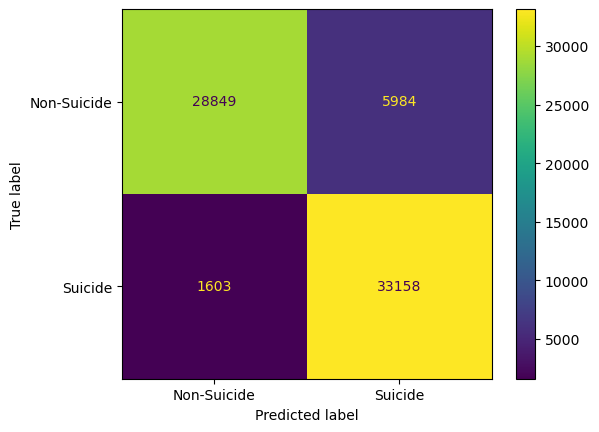

In [31]:
nb_confusion_matrix_pos = metrics.confusion_matrix(test_y_pos, y_pred_nb_pos)

nb_cm_display_pos = metrics.ConfusionMatrixDisplay(confusion_matrix = nb_confusion_matrix_pos, display_labels = ["Non-Suicide", "Suicide"])

nb_cm_display_pos.plot()
plt.show()

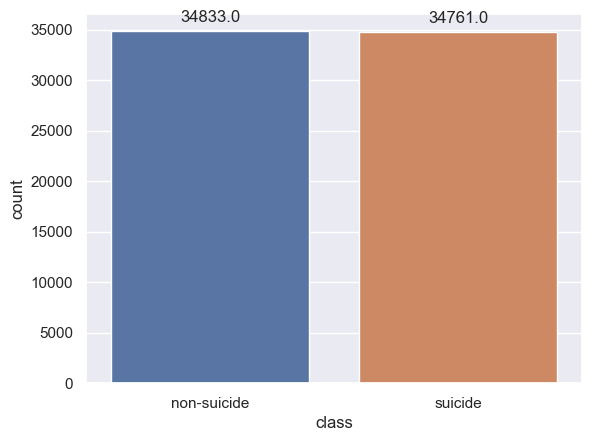

In [32]:
sns.set(style="darkgrid")
ax = sns.countplot(x=test_y_pos)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


### Sentiment Analysis

In [33]:
#Naive Bayes Classifier
naive_bayes_classifier_sa = MultinomialNB()
naive_bayes_classifier_sa.fit(train_X_sa, train_y_sa)
#predicted y
y_pred_nb_sa = naive_bayes_classifier_sa.predict(test_X_sa)

In [34]:
print(metrics.classification_report(test_y_sa, y_pred_nb_sa, target_names=['Non-Suicide', 'Suicide']))

              precision    recall  f1-score   support

 Non-Suicide       0.94      0.84      0.89     34833
     Suicide       0.86      0.95      0.90     34761

    accuracy                           0.90     69594
   macro avg       0.90      0.90      0.90     69594
weighted avg       0.90      0.90      0.90     69594



In [35]:
nb_accuracy_sa = accuracy_score(y_pred_nb_sa, test_y_sa)
print("Naive Bayes Accuracy Score -> ", nb_accuracy_sa * 100)

Naive Bayes Accuracy Score ->  89.66002816334742


In [36]:
#Naive Bayes Confusion Matrix
print("Naive Bayes Confusion Matrix:")
print(metrics.confusion_matrix(test_y_sa, y_pred_nb_sa))

Naive Bayes Confusion Matrix:
[[29348  5485]
 [ 1711 33050]]


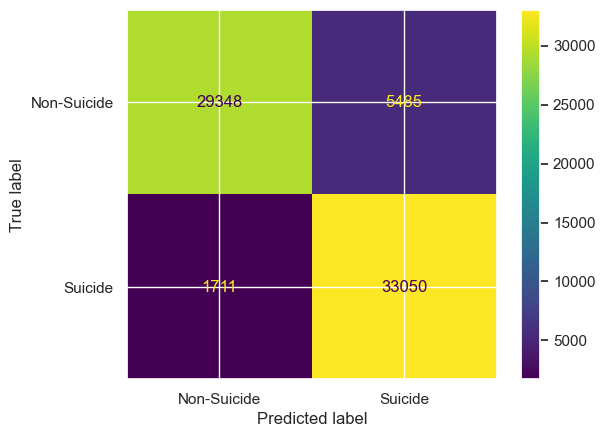

In [37]:
nb_confusion_matrix_sa = metrics.confusion_matrix(test_y_sa, y_pred_nb_sa)

nb_cm_display_sa = metrics.ConfusionMatrixDisplay(confusion_matrix = nb_confusion_matrix_sa, display_labels = ["Non-Suicide", "Suicide"])

nb_cm_display_sa.plot()
plt.show()

In [38]:
# convert test_y and y_pred_logreg to numpy arrays
test_y_sa = test_y_sa.to_numpy()
y_pred_nb_sa = np.array(y_pred_nb_sa)

# find misclassified samples
nb_misclassified_indices = [i for i in range(len(test_y_sa)) if test_y_sa[i] != y_pred_nb_sa[i]]
print(len(nb_misclassified_indices))

# create a dataframe with test_X and their true and predicted labels
df_test_nb = pd.DataFrame({'text': test_X_sa, 'true_label': test_y_sa, 'predicted_label': y_pred_nb_sa})

nb_misclassified_df = df_test_nb.iloc[nb_misclassified_indices]

nb_misclassified_df.head()

# merge misclassified_df with data based on the index
nb_misclassified_merged = pd.merge(nb_misclassified_df, data_text, left_index=True, right_index=True)

# print the misclassified texts, true labels, and predicted labels
nb_misclassified_merged_df = pd.DataFrame(nb_misclassified_merged[['text_y', 'true_label', 'predicted_label']])

nb_misclassified_merged_df.to_csv("misclassified_naive_bayes_sa.csv")

7196


## Logistic Regression

### POS_TAG + Domain_Dictionary

In [39]:
# fit the training dataset on the Logistic Regression classifier
logreg_pos = LogisticRegression(max_iter=200)
logreg_pos.fit(X_train_tf_pos,train_y_pos)
# predict the labels on validation dataset
y_pred_logreg_pos = logreg_pos.predict(X_test_tf_pos)

In [40]:
print(metrics.classification_report(test_y_pos, y_pred_logreg_pos, target_names=['Non-Suicide', 'Suicide'], digits=4))

              precision    recall  f1-score   support

 Non-Suicide     0.9274    0.9457    0.9365     34833
     Suicide     0.9445    0.9259    0.9351     34761

    accuracy                         0.9358     69594
   macro avg     0.9360    0.9358    0.9358     69594
weighted avg     0.9360    0.9358    0.9358     69594



In [41]:
logreg_accuracy_pos = accuracy_score(y_pred_logreg_pos, test_y_pos)
print("Logistic Regression Accuracy Score -> ", logreg_accuracy_pos * 100)

Logistic Regression Accuracy Score ->  93.57846940828233


In [42]:
#Log Reg Confusion Matrix
print("Logistic Regression Confusion Matrix:")
print(metrics.confusion_matrix(test_y_pos, y_pred_logreg_pos))

Logistic Regression Confusion Matrix:
[[32941  1892]
 [ 2577 32184]]


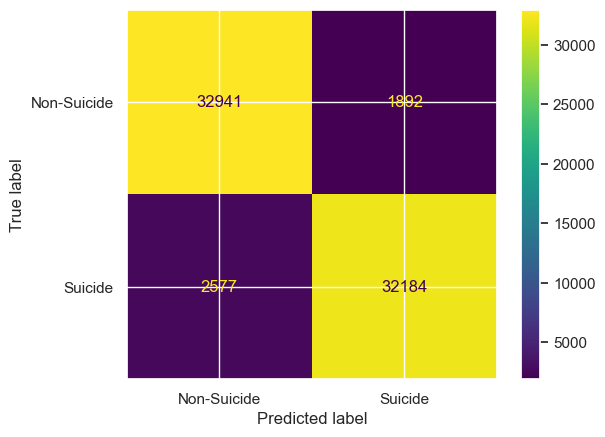

In [43]:
logreg_confusion_matrix_pos = metrics.confusion_matrix(test_y_pos, y_pred_logreg_pos)

logreg_cm_display_pos = metrics.ConfusionMatrixDisplay(confusion_matrix = logreg_confusion_matrix_pos, display_labels = ["Non-Suicide", "Suicide"])

logreg_cm_display_pos.plot()
plt.show()

In [44]:
# #### Hyperparameter tuning

# # Create a logistic regression object
# lr = LogisticRegression(max_iter=10000)

# # Define the parameter distributions to search over
# param_distributions = {
#     'penalty': ['l1', 'l2'],
#     'C': loguniform(0.01, 100),
#     'solver': ['liblinear', 'saga','newton-cg','lbfgs']
# }

# # Create a randomized search object
# random_search_pos = RandomizedSearchCV(estimator=lr, param_distributions=param_distributions, n_iter=20, cv=5, scoring='accuracy')

# # Fit the randomized search to the data
# random_search_pos.fit(X_train_tf_pos, train_y_pos)

# # Print the best hyperparameters and the best score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best score: ", random_search.best_score_)

### Sentiment Analysis

In [45]:
# fit the training dataset on the Logistic Regression classifier
logreg_sa = LogisticRegression(max_iter=1000)
logreg_sa.fit(train_X_sa,train_y_sa)
# predict the labels on validation dataset
y_pred_logreg_sa = logreg_sa.predict(test_X_sa)

In [46]:
print(metrics.classification_report(test_y_sa, y_pred_logreg_sa, target_names=['Non-Suicide', 'Suicide'], digits=4))

              precision    recall  f1-score   support

 Non-Suicide     0.9276    0.9452    0.9363     34833
     Suicide     0.9440    0.9261    0.9350     34761

    accuracy                         0.9357     69594
   macro avg     0.9358    0.9356    0.9356     69594
weighted avg     0.9358    0.9357    0.9356     69594



In [47]:
logreg_accuracy_sa = accuracy_score(y_pred_logreg_sa, test_y_sa)
print("Logistic Regression Accuracy Score -> ", logreg_accuracy_sa * 100)

Logistic Regression Accuracy Score ->  93.56553725895911


In [48]:
#Log Reg Confusion Matrix
print("Logistic Regression Confusion Matrix:")
print(metrics.confusion_matrix(test_y_sa, y_pred_logreg_sa))

Logistic Regression Confusion Matrix:
[[32924  1909]
 [ 2569 32192]]


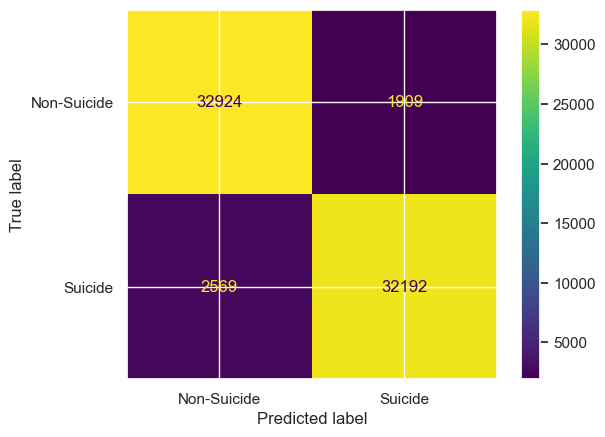

In [49]:
lr_confusion_matrix_sa = metrics.confusion_matrix(test_y_sa, y_pred_logreg_sa)

lr_cm_display_sa = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_confusion_matrix_sa, display_labels = ["Non-Suicide", "Suicide"])

lr_cm_display_sa.plot()
plt.show()

In [50]:
# convert test_y and y_pred_logreg to numpy arrays
y_pred_logreg_sa = np.array(y_pred_logreg_sa)

# find misclassified samples
logreg_misclassified_indices = [i for i in range(len(test_y_sa)) if test_y_sa[i] != y_pred_logreg_sa[i]]
print(len(logreg_misclassified_indices))

# create a dataframe with test_X and their true and predicted labels
df_test_logreg = pd.DataFrame({'text': test_X_sa, 'true_label': test_y_sa, 'predicted_label': y_pred_logreg_sa})

logreg_misclassified_df = df_test_logreg.iloc[logreg_misclassified_indices]

logreg_misclassified_df.head()

# merge misclassified_df with data based on the index
logreg_misclassified_merged = pd.merge(logreg_misclassified_df, data_text, left_index=True, right_index=True)

# print the misclassified texts, true labels, and predicted labels
logreg_misclassified_merged_df = pd.DataFrame(logreg_misclassified_merged[['text_y', 'true_label', 'predicted_label']])

logreg_misclassified_merged_df.to_csv("misclassified_logistic_regression_sa.csv")

4478


In [51]:
# #### Hyperparameter tuning


# # Create a logistic regression object
# lr = LogisticRegression(max_iter=10000)

# # Define the parameter distributions to search over
# param_distributions = {
#     'penalty': ['l1', 'l2'],
#     'C': loguniform(0.01, 100),
#     'solver': ['liblinear', 'saga','newton-cg','lbfgs']
# }

# # Create a randomized search object
# random_search_sa = RandomizedSearchCV(estimator=lr, param_distributions=param_distributions, n_iter=20, cv=5, scoring='accuracy')

# # Fit the randomized search to the data
# random_search_sa.fit(train_X_sa, train_y_sa)

# # Print the best hyperparameters and the best score
# print("Best hyperparameters: ", random_search.best_params_)
# print("Best score: ", random_search.best_score_)

## SVM

### POS_TAG + Domain_Dictionary

In [52]:
# fit the training dataset on the SVM classifier
linearSVC_pos = LinearSVC()
linearSVC_pos.fit(X_train_tf_pos,train_y_pos)
# predict the labels on validation dataset
y_pred_SVC_pos = linearSVC_pos.predict(X_test_tf_pos)


In [53]:
print(metrics.classification_report(test_y_pos, y_pred_SVC_pos, target_names=['Non-Suicide', 'Suicide'], digits=4))

              precision    recall  f1-score   support

 Non-Suicide     0.9287    0.9431    0.9358     34833
     Suicide     0.9421    0.9274    0.9347     34761

    accuracy                         0.9353     69594
   macro avg     0.9354    0.9353    0.9353     69594
weighted avg     0.9354    0.9353    0.9353     69594



In [54]:
svc_accuracy_pos = accuracy_score(y_pred_SVC_pos, test_y_pos)
print("SVM Accuracy Score -> ",svc_accuracy_pos*100)

SVM Accuracy Score ->  93.52817771646981


In [55]:
#SVM Confusion Matrix
print("SVM Confusion Matrix:")
print(metrics.confusion_matrix(test_y_pos, y_pred_SVC_pos))

SVM Confusion Matrix:
[[32852  1981]
 [ 2523 32238]]


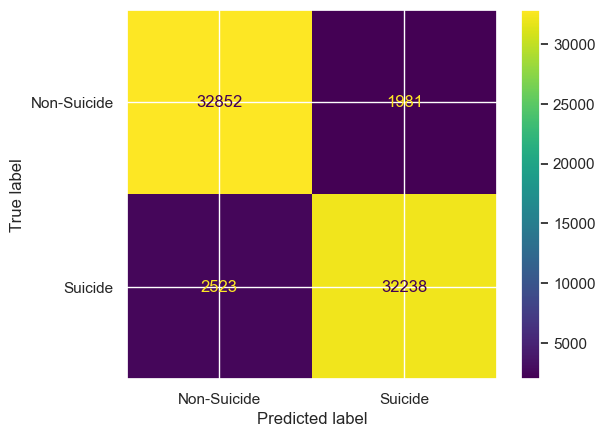

In [56]:
svc_confusion_matrix_pos = metrics.confusion_matrix(test_y_pos, y_pred_SVC_pos)

svc_cm_display_pos = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_confusion_matrix_pos, display_labels = ["Non-Suicide", "Suicide"])

svc_cm_display_pos.plot()
plt.show()

### Sentiment Analysis

In [57]:
# fit the training dataset on the SVM classifier
linearSVC_sa = LinearSVC()
linearSVC_sa.fit(train_X_sa,train_y_sa)
# predict the labels on validation dataset
y_pred_SVC_sa = linearSVC_sa.predict(test_X_sa)


In [58]:
print(metrics.classification_report(test_y_sa, y_pred_SVC_sa, target_names=['Non-Suicide', 'Suicide']))

              precision    recall  f1-score   support

 Non-Suicide       0.93      0.94      0.94     34833
     Suicide       0.94      0.93      0.93     34761

    accuracy                           0.94     69594
   macro avg       0.94      0.94      0.94     69594
weighted avg       0.94      0.94      0.94     69594



In [59]:
svc_accuracy_sa = accuracy_score(y_pred_SVC_sa, test_y_sa)
print("SVM Accuracy Score -> ",svc_accuracy_sa*100)

SVM Accuracy Score ->  93.5080610397448


In [60]:
#SVM Confusion Matrix
print("SVM Confusion Matrix:")
print(metrics.confusion_matrix(test_y_sa, y_pred_SVC_sa))

SVM Confusion Matrix:
[[32842  1991]
 [ 2527 32234]]


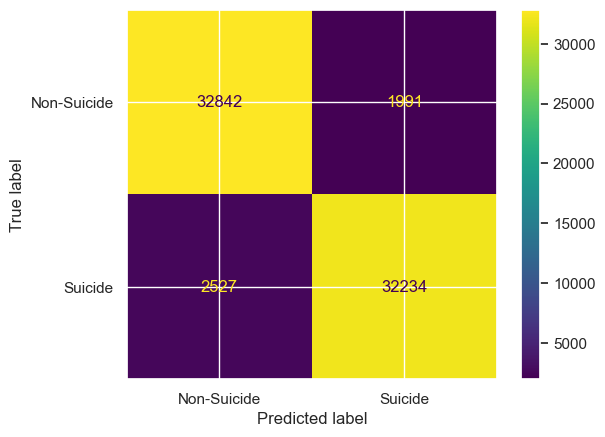

In [61]:
svc_confusion_matrix_sa = metrics.confusion_matrix(test_y_sa, y_pred_SVC_sa)

svc_cm_display_sa = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_confusion_matrix_sa, display_labels = ["Non-Suicide", "Suicide"])

svc_cm_display_sa.plot()
plt.show()

In [62]:
# convert test_y and y_pred_logreg to numpy arrays
y_pred_SVC_sa = np.array(y_pred_SVC_sa)

# find misclassified samples
svc_misclassified_indices = [i for i in range(len(test_y_sa)) if test_y_sa[i] != y_pred_SVC_sa[i]]
print(len(svc_misclassified_indices))

# create a dataframe with test_X and their true and predicted labels
df_test_SVC = pd.DataFrame({'text': test_X_sa, 'true_label': test_y_sa, 'predicted_label': y_pred_SVC_sa})

SVC_misclassified_df = df_test_SVC.iloc[svc_misclassified_indices]

SVC_misclassified_df.head()

# merge misclassified_df with data based on the index
SVC_misclassified_merged = pd.merge(SVC_misclassified_df, data_text, left_index=True, right_index=True)

# print the misclassified texts, true labels, and predicted labels
SVC_misclassified_merged_df = pd.DataFrame(SVC_misclassified_merged[['text_y', 'true_label', 'predicted_label']])

SVC_misclassified_merged_df.to_csv("misclassified_SVM_sa.csv")

4518


### Test Sample Prediction

In [63]:
#sample prediction
test = ['i want to die. cannot live any longer. help']

In [64]:
### loading stanford core nlp pos tagger
import os
os.environ['JAVAHOME'] = 'C:/Program Files/Java/jdk-17.0.1/bin'
os.environ['STANFORD_PARSER'] = 'C:/stanford-corenlp-4.5.3'
os.environ['STANFORD_MODELS'] = 'C:/stanford-corenlp-4.5.3'

from nltk.parse import CoreNLPParser

pos_tagger = CoreNLPParser(url='http://localhost:9000', tagtype='pos')

In [65]:
#preprocess
review = re.sub("(\\t|\\n)", " ", test[0])
review = re.sub("[^a-zA-Z']", " ", review)
review = re.sub("(?:_|[^a-z0-9_:])[;:=]+[\)\(\-\[\]\/|DPO]", "", review)
review = re.sub("[0-9]+", "", review)
review = review.strip()
# expanding the contractions
review = ' '.join([contractions.fix(x) for x in review.split(" ")])
# split joint words
review = ' '.join(wordninja.split(review))
#stop words removal
stop_list = stopwords.words('english')
stop_list.remove('not')
lemmatizer = WordNetLemmatizer()
review = review.split()
review = [lemmatizer.lemmatize(word) for word in review if not word in stop_list]
print(review)

['want', 'die', 'cannot', 'live', 'longer', 'help']


In [66]:
def add_pos_tags(sentences):
    tagged_sentences = []
    for sentence in sentences:
        #get POS tags for each word
        pos_tag = pos_tagger.tag([sentence])[0][1]
        #join word and pos tag
        tagged_token = f"{sentence}_{pos_tag}"
        #join tagged words into sentence
        tagged_sentence = "".join(tagged_token)
        # Add tagged sentence to list
        tagged_sentences.append(tagged_sentence)
    return tagged_sentences     

test_tagged = add_pos_tags(review)
print(test_tagged)

['want_VB', 'die_VB', 'cannot_MD', 'live_RB', 'longer_RB', 'help_NN']


In [67]:
test_processed =[ ' '.join(test_tagged)]
test_processed

['want_VB die_VB cannot_MD live_RB longer_RB help_NN']

### POS Tag + Domain Dictionary

In [68]:
test_input_pos = tf_idf_pos.transform(test_processed)
test_input_pos.shape

(1, 43957)

In [69]:
#sklearn Naive Bayes
nb_result_pos = naive_bayes_classifier_pos.predict(test_input_pos)[0]
nb_result_pos

'suicide'

In [70]:
#LogReg
logreg_result_pos = logreg_pos.predict(test_input_pos)[0]
logreg_result_pos

'suicide'

In [71]:
#SVM
SVC_result_pos = linearSVC_pos.predict(test_input_pos)[0]
SVC_result_pos

'suicide'

### Sentiment Analysis

In [72]:
from nrclex import NRCLex
sentence = ' '.join(review)
emotion = NRCLex(sentence).affect_frequencies
df = pd.DataFrame(emotion, index=[0])
df = df.rename(columns={'anticip': 'anticipation'})
df['anticip'] = 0
df 

,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy,anticip
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0


In [73]:
sa_vec = tfidf_vectorizer_sa.transform(test_processed)
sa_vec.shape

(1, 47577)

In [74]:
import scipy.sparse as sp
extra_features_sparse = sp.csr_matrix( df[["fear", "anger", "anticip", "trust", "surprise", "positive", "negative", "sadness","disgust", "joy", "anticipation"]].values)


In [75]:
#sklearn Naive Bayes
nb_result_pos = naive_bayes_classifier_pos.predict(test_input_pos)[0]
nb_result_pos

'suicide'

In [76]:
#LogReg
logreg_result_pos = logreg_pos.predict(test_input_pos)[0]
logreg_result_pos

'suicide'

In [77]:
#SVM
SVC_result_pos = linearSVC_pos.predict(test_input_pos)[0]
SVC_result_pos

'suicide'